<a href="https://colab.research.google.com/github/hallinearaujo/array_girls/blob/main/compara%C3%A7%C3%A3o_entre_LDA_e_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
#Author: Halline Araújo
#comparação entre LDA e PCA
#Executou a database iris apresentando em dois planos: LDA e PCA usando o passo a passo descrito no slide

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# database
from sklearn.datasets import load_iris

%matplotlib inline
pd.options.display.max_rows = 10

In [4]:
iris = load_iris()
print(iris.data.shape)
print(iris.target.shape)
print(iris.feature_names)
print(iris.target_names)

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['class'] = iris.target
# df['class'] = df['class'].map({0:iris.target_names[0], 1:iris.target_names[1], 2:iris.target_names[2]})
df

(150, 4)
(150,)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
# split the data table into data X and class labels Y
x = df.iloc[:, 0:4].values
y = df.iloc[:, 4].values
print(x.shape, y.shape)

(150, 4) (150,)


In [6]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


<ipython-input-7-11ad030f4a4d>:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  plt.hist(x[y==label, f], label=label, bins=10, alpha=0.3)


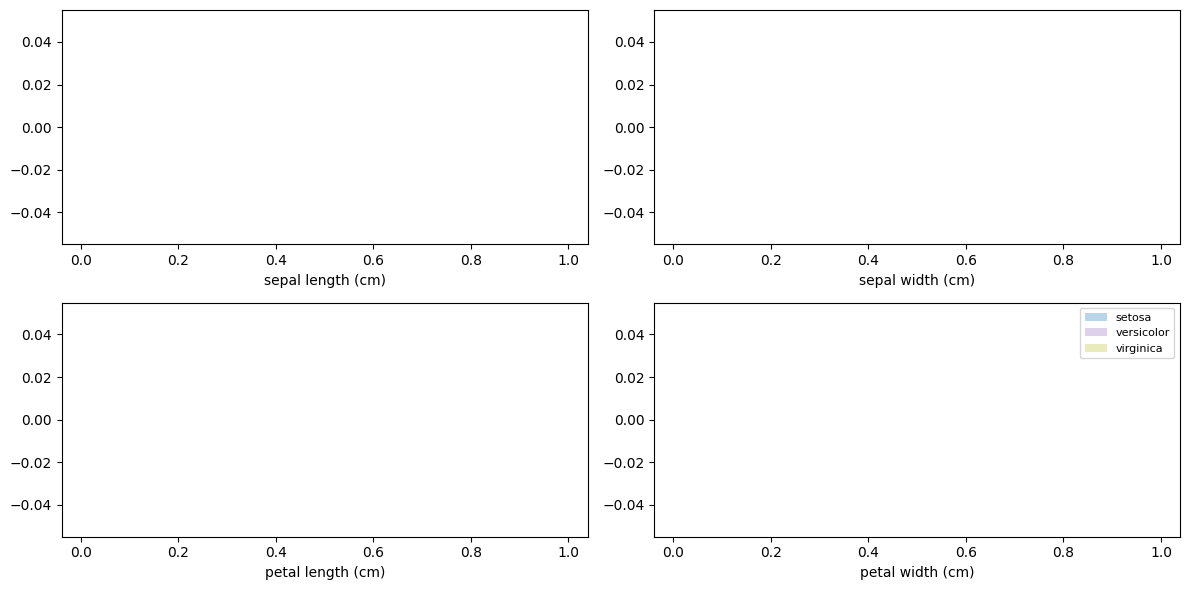

In [7]:
plt.figure(figsize=(12,6))
for f in range(4):
    plt.subplot(2, 2, f+1)
    for label in iris.target_names:
        plt.hist(x[y==label, f], label=label, bins=10, alpha=0.3)
        plt.xlabel(iris.feature_names[f])
plt.legend(loc='upper right', fancybox=True, fontsize=8)
plt.tight_layout()

In [8]:
mean_vectors = []
for c in range(0,3):
    mean_vectors.append(np.mean(x[y==c], axis=0))
    print('Mean vector class {0}: {1}'.format(c, mean_vectors[c]))

Mean vector class 0: [5.006 3.428 1.462 0.246]
Mean vector class 1: [5.936 2.77  4.26  1.326]
Mean vector class 2: [6.588 2.974 5.552 2.026]


In [9]:
S_W = np.zeros((4,4))
for c,mv in zip(range(0,3), mean_vectors):
    class_sc_mat = np.zeros((4,4))                  # scatter matrix for every class
    for row in x[y == c]:
        row, mv = row.reshape(4,1), mv.reshape(4,1) # make column vectors
        class_sc_mat += (row-mv).dot((row-mv).T)
    S_W += class_sc_mat                             # sum class scatter matrices
print('intra-classe scatter matrix:\n', S_W)

intra-classe scatter matrix:
 [[38.9562 13.63   24.6246  5.645 ]
 [13.63   16.962   8.1208  4.8084]
 [24.6246  8.1208 27.2226  6.2718]
 [ 5.645   4.8084  6.2718  6.1566]]


In [10]:
overall_mean = np.mean(x, axis=0)

S_B = np.zeros((4,4))
for i, mean_vec in enumerate(mean_vectors):
    n = x[y==i,:].shape[0]
    mean_vec = mean_vec.reshape(4,1) # make column vector
    overall_mean = overall_mean.reshape(4,1) # make column vector
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
    
print('entre-classes scatter matrix:\n', S_B)

entre-classes scatter matrix:
 [[ 63.21213333 -19.95266667 165.2484      71.27933333]
 [-19.95266667  11.34493333 -57.2396     -22.93266667]
 [165.2484     -57.2396     437.1028     186.774     ]
 [ 71.27933333 -22.93266667 186.774       80.41333333]]


In [11]:
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(4,1)
    print('\nAutovetor {0}: \n{1}'.format(i+1, eigvec_sc.real))
    print('Autovalor {:}: {:.2e}'.format(i+1, eig_vals[i].real))


Autovetor 1: 
[[-0.20874182]
 [-0.38620369]
 [ 0.55401172]
 [ 0.7073504 ]]
Autovalor 1: 3.22e+01

Autovetor 2: 
[[-0.00653196]
 [-0.58661055]
 [ 0.25256154]
 [-0.76945309]]
Autovalor 2: 2.85e-01

Autovetor 3: 
[[-0.14156417]
 [-0.212536  ]
 [-0.27030318]
 [ 0.69269842]]
Autovalor 3: -2.89e-15

Autovetor 4: 
[[-0.14156417]
 [-0.212536  ]
 [-0.27030318]
 [ 0.69269842]]
Autovalor 4: -2.89e-15


In [12]:
for i in range(len(eig_vals)):
    eigv = eig_vecs[:,i].reshape(4,1)
    print(np.linalg.inv(S_W).dot(S_B).dot(eigv).T, (eig_vals[i]*eigv).T, sep='\n', end='\n\n')

[[ -6.71980194+0.j -12.43264174+0.j  17.83470592+0.j  22.77097388+0.j]]
[[ -6.71980194+0.j -12.43264174+0.j  17.83470592+0.j  22.77097388+0.j]]

[[-0.00186416+0.j -0.1674134 +0.j  0.0720788 +0.j -0.21959502+0.j]]
[[-0.00186416+0.j -0.1674134 +0.j  0.0720788 +0.j -0.21959502+0.j]]

[[-8.88178420e-16+9.15933995e-16j  6.21724894e-15+2.44249065e-15j
  -2.66453526e-15-1.66533454e-15j -5.32907052e-15-4.44089210e-16j]]
[[-8.34661064e-16-1.85470527e-15j  1.15953345e-15+1.63192372e-16j
   1.32302205e-15+2.22370886e-17j -2.00241471e-15+1.63892325e-15j]]

[[-8.88178420e-16-9.15933995e-16j  6.21724894e-15-2.44249065e-15j
  -2.66453526e-15+1.66533454e-15j -5.32907052e-15+4.44089210e-16j]]
[[-8.34661064e-16+1.85470527e-15j  1.15953345e-15-1.63192372e-16j
   1.32302205e-15-2.22370886e-17j -2.00241471e-15-1.63892325e-15j]]



In [13]:
# Cria uma lista de tuplas (autovalor, autovetor)
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Ordena o par em ordem decrescente
eig_pairs.sort()
eig_pairs.reverse()

print('Autovalores em ordem decrescente:')
for i in eig_pairs:
    print(i[0])

ValueError: ignored

In [14]:
print('Variância explicada')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))

Variância explicada
eigenvalue 1: 99.12%
eigenvalue 2: 0.88%
eigenvalue 3: 0.00%
eigenvalue 4: 0.00%


In [15]:
W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))
print('Matriz W:', W.real, sep='\n')

Matriz W:
[[-0.20874182 -0.00653196]
 [-0.38620369 -0.58661055]
 [ 0.55401172  0.25256154]
 [ 0.7073504  -0.76945309]]


In [16]:
X = x.dot(W)
X.shape


(150, 2)

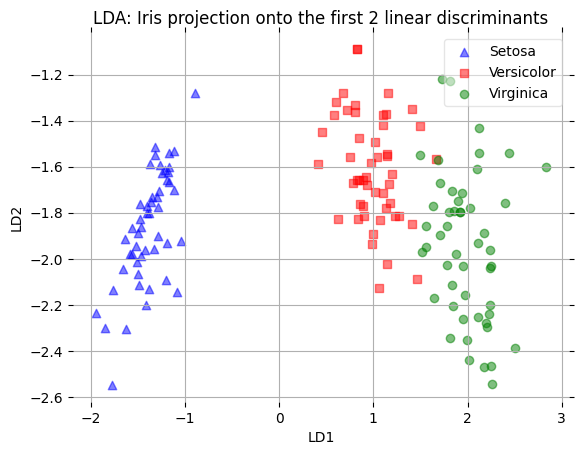

In [17]:
def plot_step_lda():
    label_dict = {0: 'Setosa', 1: 'Versicolor', 2:'Virginica'}
    
    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(0,3),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X[:,0].real[y == label],
                y=X[:,1].real[y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Iris projection onto the first 2 linear discriminants')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

plot_step_lda()

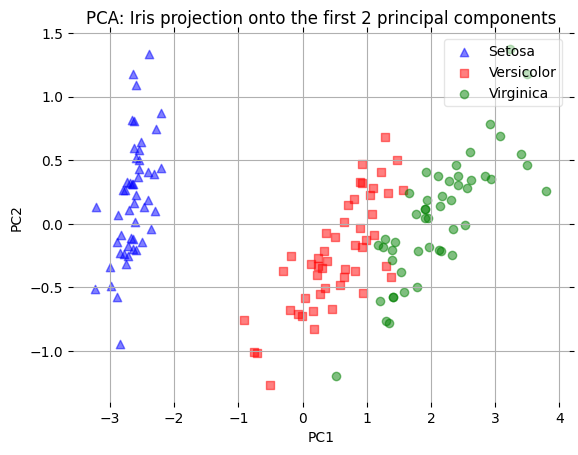

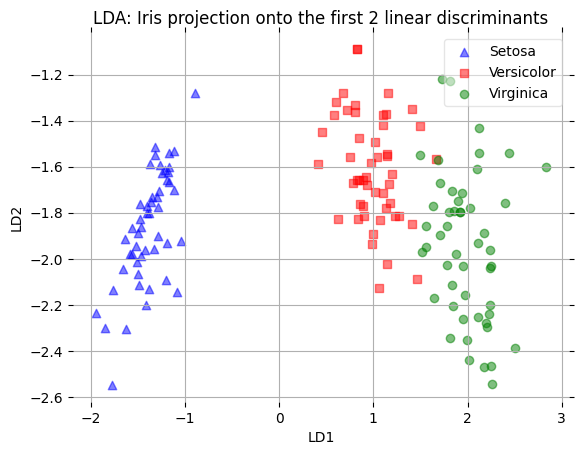

In [19]:
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=2)
X_pca = sklearn_pca.fit_transform(x)

def plot_pca():    
    label_dict = {0: 'Setosa', 1: 'Versicolor', 2:'Virginica'}
    ax = plt.subplot(111)

    for label,marker,color in zip(
        range(0,3),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X_pca[:,0][y == label],
                y=X_pca[:,1][y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('PC1')
    plt.ylabel('PC2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('PCA: Iris projection onto the first 2 principal components')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.tight_layout
    plt.grid()

    plt.show()

plot_pca()
plot_step_lda()

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

sklearn_lda = LDA(n_components=2)
x_lda_sklearn = sklearn_lda.fit_transform(x, y)

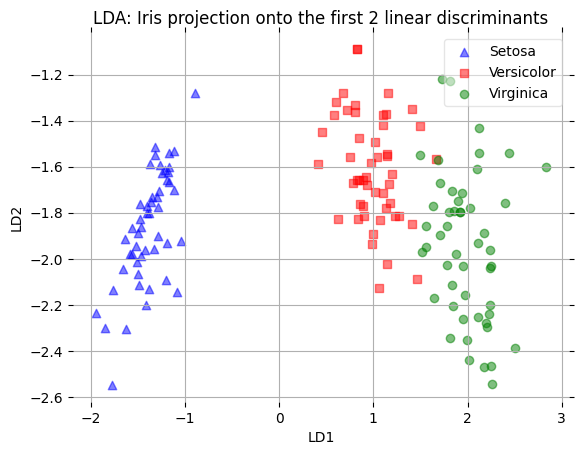

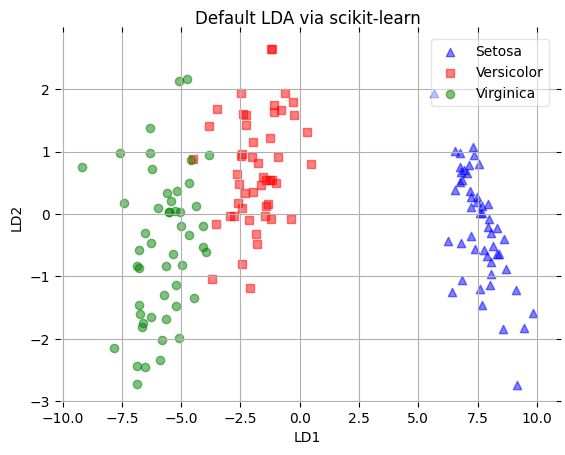

In [21]:
def plot_scikit_lda(X, title):
    label_dict = {0: 'Setosa', 1: 'Versicolor', 2:'Virginica'}
    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(0,3),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X[:,0][y == label],
                    y=X[:,1][y == label] * -1, # flip the figure
                    marker=marker,
                    color=color,
                    alpha=0.5,
                    label=label_dict[label])

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

plot_step_lda()
plot_scikit_lda(x_lda_sklearn, title='Default LDA via scikit-learn')